# Pointing Error
In this notebook we look closer at the pitch/yaw/roll data provided by EnduroSat.

The satellite will orbit in a SSO orbit, and ideally points toward Alpha Centauri while on the right side of the Earth, and then performs an (up to) 180 degree yaw flip maneuver to face away from the Earth when behind the Earth. It aims to have a 20 minute observation period per orbit, after the pointing has stabilised to a ($3\sigma$) 10 arcsecond accuracy after the yaw flip. To stabilise, the CubeSat uses a course pointing system and then transitions to an ultra-fine pointing system.

The data shows the pitch/yaw/roll of TOLIMAN over six orbits. Originally the IDLE operation period have all values set to zeroes, but I have replaced these with NaNs.

In [133]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from dLux.utils import r2s
os.chdir('/Users/mcha5804/Library/CloudStorage/OneDrive-TheUniversityofSydney(Students)/PyCharm/toliman-phd')

%matplotlib inline
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams["font.family"] = 'monospace'
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['figure.dpi'] = 120
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [134]:
df = pd.read_csv('data/pointingerror.csv')

t = df['time [s]'] / 60  # minutes
pitch = df['pitch [rad]'].to_numpy()  # deg
yaw = df['yaw [rad]'].to_numpy()  # deg
roll = df['roll [rad]'].to_numpy()  # deg

total = np.sqrt(pitch**2 + yaw**2 + roll**2)

on = np.where(pitch!=0)[0]
off = np.where(pitch==0)[0]
status = np.zeros(len(pitch))
status[on] = 1

pitch[off] = np.nan; yaw[off] = np.nan; roll[off] = np.nan

pitch_color = '#75bbfd'  #
yaw_color = '#748b97'  #
roll_color = '#06c2ac'  #
total_color = '#7e1e9c'  #

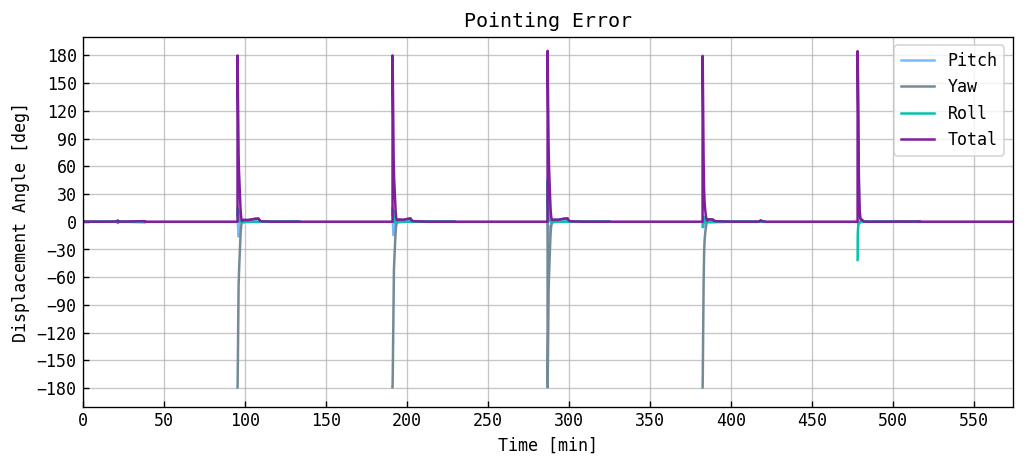

In [135]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, np.rad2deg(pitch), label = 'Pitch', c=pitch_color)
ax.plot(t, np.rad2deg(yaw), label = 'Yaw', c=yaw_color)
ax.plot(t, np.rad2deg(roll), label = 'Roll', c=roll_color)
ax.plot(t, np.rad2deg(total), label = 'Total', c=total_color)
ax.set(xlabel = 'Time [min]',
       ylabel = 'Displacement Angle [deg]',
       title = 'Pointing Error',
       xlim = (0, t.max()),
       ylim = (-200,200),
       xticks = np.arange(0, t.max(), 50),
       yticks = np.arange(-180, 210, 30),
       )
ax.legend()
ax.grid(alpha=.7)
plt.show()

This view is a little misleading as the data is not recorded when the telescope is idle (i.e. when it is on the wrong side of the Earth). Each "spike" (which is not really a spike, its the tail end of a ~45 minute period of pointing away from the Earth). Let's look at the data for (half of) a single orbit.

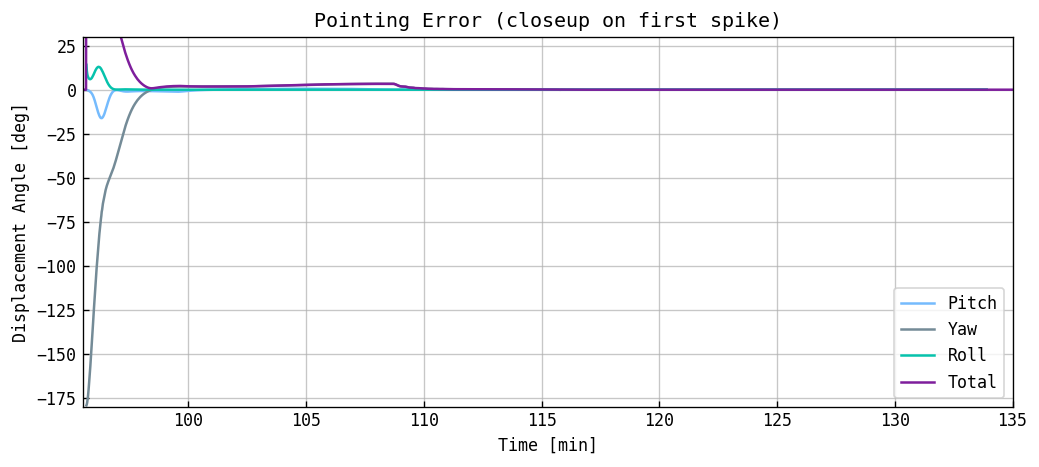

In [136]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, np.rad2deg(pitch), label = 'Pitch', c=pitch_color)
ax.plot(t, np.rad2deg(yaw), label = 'Yaw', c=yaw_color)
ax.plot(t, np.rad2deg(roll), label = 'Roll', c=roll_color)
ax.plot(t, np.rad2deg(total), label = 'Total', c=total_color)
ax.set(xlabel = 'Time [min]',
       ylabel = 'Displacement Angle [deg]',
       title = 'Pointing Error (closeup on first spike)',
       xlim = (95.5, 135),
       ylim = (-180,30),
       # xticks = np.arange(95.5, 120, .5),
       # yticks = np.arange(-180, 210, 30),
       )
ax.legend()
ax.grid(alpha=.7)
plt.show()

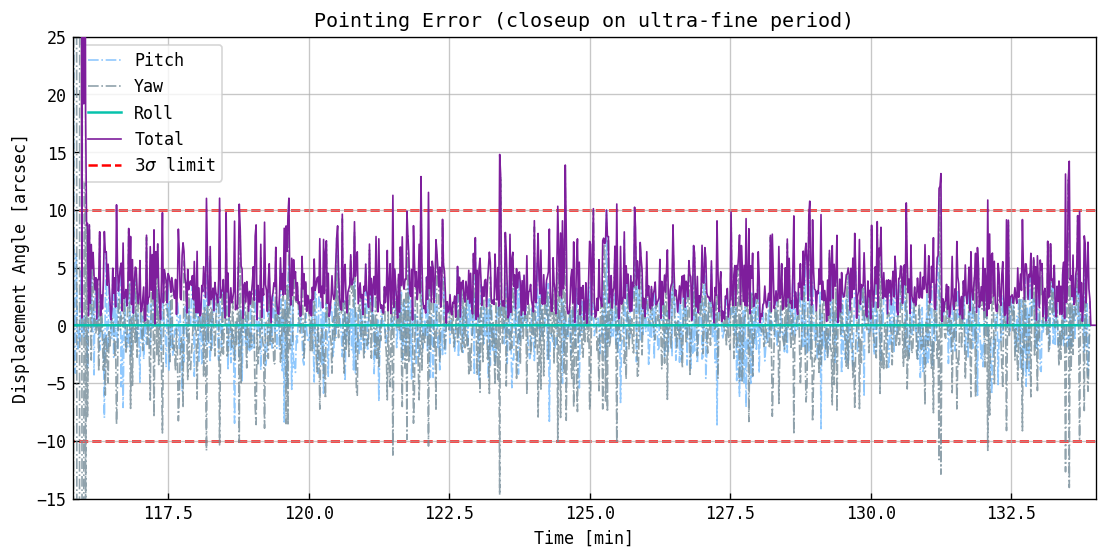

In [137]:
ylim=20
fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(t, r2s(pitch), label = 'Pitch', c=pitch_color, linewidth=1, alpha=.8, linestyle='-.')
ax.plot(t, r2s(yaw), label = 'Yaw', c=yaw_color, linewidth=1, alpha=.8, linestyle='-.')
ax.plot(t, r2s(roll), label = 'Roll', c=roll_color)
ax.plot(t, r2s(total), label = 'Total', c=total_color, linewidth=1, alpha=1, zorder=100)

ax.plot((t.min(), t.max()), (10,10), 'r--', label = r'$3\sigma$ limit', zorder=-1)
ax.plot((t.min(), t.max()), (-10,-10), 'r--', zorder=-1)
ax.set(xlabel = 'Time [min]',
       ylabel = 'Displacement Angle [arcsec]',
       title = 'Pointing Error (closeup on ultra-fine period)',
       xlim = (115.8, 134),
       ylim = np.array((-ylim,ylim)) +5,
       # xticks = np.arange(95.5, 120, .5),
       # yticks = np.arange(-180, 210, 30),
       )
ax.legend()
ax.grid(alpha=.7)
plt.show()

This above graph is zoomed in on the ultra-fine pointing period (see the pointing error displacement angle is now measured in arcseconds).

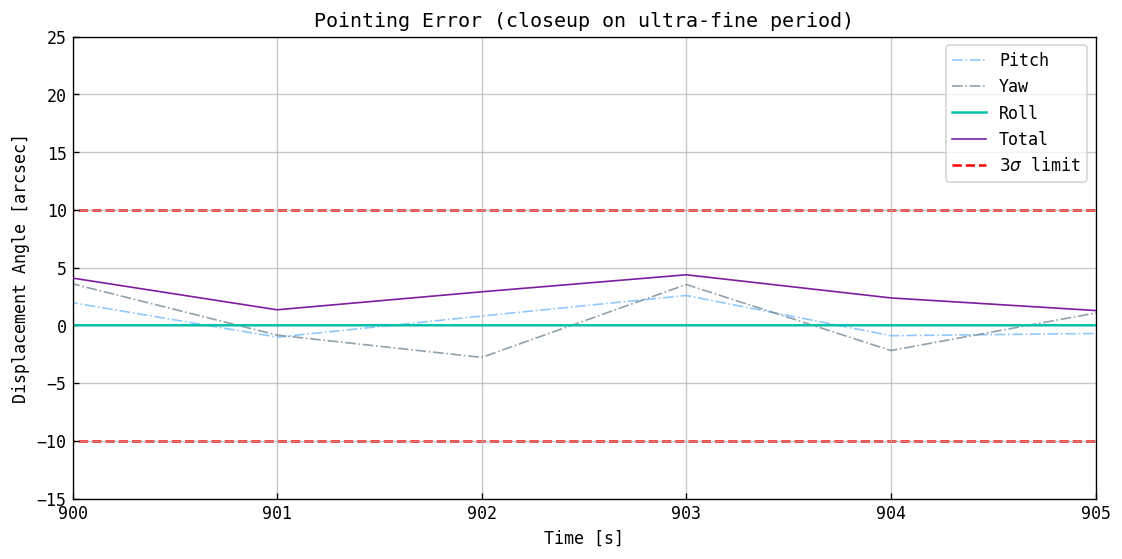

In [132]:
ylim=20
t_secs = df['time [s]']
fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(t_secs, r2s(pitch), label = 'Pitch', c=pitch_color, linewidth=1, alpha=.8, linestyle='-.')
ax.plot(t_secs, r2s(yaw), label = 'Yaw', c=yaw_color, linewidth=1, alpha=.8, linestyle='-.')
ax.plot(t_secs, r2s(roll), label = 'Roll', c=roll_color)
ax.plot(t_secs, r2s(total), label = 'Total', c=total_color, linewidth=1, alpha=1, zorder=100)

ax.plot((t_secs.min(), t_secs.max()), (10,10), 'r--', label = r'$3\sigma$ limit', zorder=-1)
ax.plot((t_secs.min(), t_secs.max()), (-10,-10), 'r--', zorder=-1)
ax.set(xlabel = 'Time [s]',
       ylabel = 'Displacement Angle [arcsec]',
       title = 'Pointing Error (closeup on ultra-fine period)',
       xlim = (900, 905),
       ylim = np.array((-ylim,ylim)) +5,
       # xticks = np.arange(95.5, 120, .5),
       # yticks = np.arange(-180, 210, 30),
       )
ax.legend()
ax.grid(alpha=.7)
plt.show()